Lending Club Case Study

- Data provided
    - loan.csv
    - Data_Dictionary.xlsx

Problem Statement:
    - Finding driving factors (driver variables) behind loan default

In [46]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.width = 1000
# Set the option to display all info columns
pd.set_option('display.max_info_columns', 500)




In [47]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

print('Shape: ',loan_df.shape)
print('Columns: ',loan_df.columns)
print('Info: ')
print(loan_df.info())

Shape:  (39717, 111)
Columns:  Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], dtype='object', length=111)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                        

There are too manay rows and columns,

Let's start by looking at null values in columns
If a column has more than 75% null/missnig values may be we can exlude those values

In [48]:
# Check For Columns with more than 75% missing values
threshold = len(loan_df) * 0.75

columns_with_missing_values = loan_df.isnull().sum()
columns_to_drop = columns_with_missing_values[columns_with_missing_values > threshold].index.tolist()

print(f"Columns to drop (more than 75% missing values): {columns_to_drop}")
print(len(columns_to_drop))

Columns to drop (more than 75% missing values): ['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_b

- Some Columns are like 'month since' where null values could actually act as categorical variables as well, but lets ignore them for null

- Some ccolumns only have single value, and hence does not provide any insight, hence these can be included in columns to be dropped

In [49]:
print('pymnt_plan: ',loan_df['pymnt_plan'].value_counts())
print('initial_list_status: ',loan_df['initial_list_status'].value_counts())
print('collections_12_mths_ex_med: ',loan_df['collections_12_mths_ex_med'].value_counts())
print('policy_code: ',loan_df['policy_code'].value_counts())
print('application_type: ',loan_df['application_type'].value_counts())
print('acc_now_delinq: ',loan_df['acc_now_delinq'].value_counts())
print('chargeoff_within_12_mths: ',loan_df['chargeoff_within_12_mths'].value_counts())
print('tax_liens: ',loan_df['tax_liens'].value_counts())
# print('total_pymnt_inv: ',loan_df['total_pymnt_inv'].value_counts())
# print('out_prncp_inv:',loan_df['out_prncp_inv'].value_counts())
# print('pub_rec_bankruptcies: ',loan_df['pub_rec_bankruptcies'].value_counts())

#['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','tax_liens']


pymnt_plan:  pymnt_plan
n    39717
Name: count, dtype: int64
initial_list_status:  initial_list_status
f    39717
Name: count, dtype: int64
collections_12_mths_ex_med:  collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64
policy_code:  policy_code
1    39717
Name: count, dtype: int64
application_type:  application_type
INDIVIDUAL    39717
Name: count, dtype: int64
acc_now_delinq:  acc_now_delinq
0    39717
Name: count, dtype: int64
chargeoff_within_12_mths:  chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64
tax_liens:  tax_liens
0.0    39678
Name: count, dtype: int64


Dropping the columns.....

In [50]:
columns_to_drop.append('pymnt_plan')
columns_to_drop.append('initial_list_status')
columns_to_drop.append('collections_12_mths_ex_med')
columns_to_drop.append('policy_code')
columns_to_drop.append('application_type')
columns_to_drop.append('acc_now_delinq')
columns_to_drop.append('chargeoff_within_12_mths')
columns_to_drop.append('tax_liens')

print('Columns to be dropped: ',columns_to_drop)
print('Number of Columns to be dropped',len(columns_to_drop))
print('Number of Columns before dropping: ',loan_df.shape[1])

loan_df = loan_df.drop(columns=columns_to_drop)

print('Number of Columns after dropping: ',loan_df.shape[1])
print('Info after dropping: ',loan_df.info())

Columns to be dropped:  ['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_l

Null value processing and Derived Columns

-   'revol_util': Strings with percentage values needs to be converted to float and then null values can be populated with mean
        -   This column gives ratio of revoling balance (amount of balance left from total outstanding at end of billing cycle)/ total credit

-   'emp_length': Employment length in years with symbols like +, > as string to be converted to int while also removing null values
        - Introduce new column 'emp_length_int' to look at this column from both categorical and quantitative perspective

-   'earliest_cr_line' : Year of earliest credit line of customer can be extracted

-   'term': Convert to int from String

-   'int_rate': Convert to float from string with % symbol

In [51]:
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: str(x).replace('%','')).astype(float)
revol_util_mean = loan_df['revol_util'].mean()
loan_df['revol_util'].fillna(revol_util_mean, inplace=True)

loan_df['emp_length_int'] = (loan_df['emp_length'].apply(lambda x: str(x).replace(' years','').replace(' year','').replace('n/a','0').replace('< 1','0.5').replace('+','')).astype(float)).fillna(2.0)

loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y').dt.year

loan_df['pub_rec_bankruptcies'].fillna(0, inplace=True)

# Convert 'term' to numeric
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.strip().replace(' months','')))

#convert int_rate to float
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: str(x).replace('%','')).astype(float)

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

/var/folders/kr/2dz_dl891y34ggnynv903xd80000gn/T/ipykernel_96339/3385923951.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['revol_util'].fillna(revol_util_mean, inplace=True)
/var/folders/kr/2dz_dl891y34ggnynv903xd80000gn/T/ipykernel_96339/3385923951.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

Let try to find if the numeric columns has outliers or not

In [52]:
# SUMMARY OF OUTLIERS

numDf = loan_df.select_dtypes(include='number')



def outlier_detection(df, column_list):
    columns_with_outliers = {}
    for col in column_list:
        Q25 = df[col].quantile(0.25)
        Q75 = df[col].quantile(0.75)
        IQR = Q75 - Q25
        lower_bound = Q25 - 1.5 * IQR
        upper_bound = Q75 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        columns_with_outliers[col] = outliers
    
    return columns_with_outliers

outliers_info = outlier_detection(numDf, numDf.columns.to_list())

for col in outliers_info:
    indices = outliers_info[col]
    if indices:
        #print(f"Column '{col}': Outlier indices - {indices}, Outlier values - {numDf.loc[indices, col].tolist()}")
        outlier_values = numDf.loc[indices, col].tolist()
        dedup_outlier_val =  list(set(outlier_values))
        dedup_outlier_val.sort()
        print(f"Column '{col}'({len(dedup_outlier_val)}), Outlier values - {dedup_outlier_val}")
    # else:
    #     print(f"Column '{col}' has no outliers.")


Column 'member_id'(26), Outlier values - [70699, 73673, 74724, 76583, 80353, 80364, 84914, 85483, 86999, 89243, 90390, 90607, 90962, 92174, 92390, 92423, 92502, 92529, 92542, 92661, 92671, 93057, 93254, 94256, 95212, 95222]
Column 'loan_amnt'(53), Outlier values - [29275, 29300, 29375, 29500, 29550, 29600, 29700, 29800, 29850, 29900, 30000, 30100, 30225, 30400, 30500, 30600, 30750, 30800, 31000, 31025, 31050, 31150, 31200, 31300, 31325, 31400, 31500, 31700, 31725, 31800, 31825, 32000, 32250, 32275, 32350, 32400, 32500, 32525, 32775, 32875, 33000, 33250, 33425, 33500, 33600, 33950, 34000, 34200, 34475, 34525, 34675, 34800, 35000]
Column 'funded_amnt'(51), Outlier values - [29500, 29525, 29550, 29575, 29600, 29700, 29775, 29800, 29850, 30000, 30100, 30225, 30400, 30500, 30525, 30600, 30750, 30800, 31000, 31025, 31050, 31150, 31200, 31300, 31325, 31400, 31500, 31700, 31750, 31800, 31825, 32000, 32250, 32275, 32350, 32400, 32500, 32525, 32875, 33000, 33250, 33500, 33600, 33950, 34000, 3425

In [53]:
# Define the bin edges
bins = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]

# Define the labels for each bin
labels = [
    '0-2.5', '2.5-5', '5-7.5', '7.5-10', '10-12.5',
    '12.5-15', '15-17.5', '17.5-20', '20-22.5', '22.5-25'
]

# Create the new column
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins=bins, labels=labels, right=False)


These outlier info will help in analysis further.

Now lets start looking at data from the perspective of loan status

Q1: 37000.0, Q3: 75000.0, IQR: 38000.0
Annual Income - Lower Bound: 8500.0, Upper Bound: 103500.0


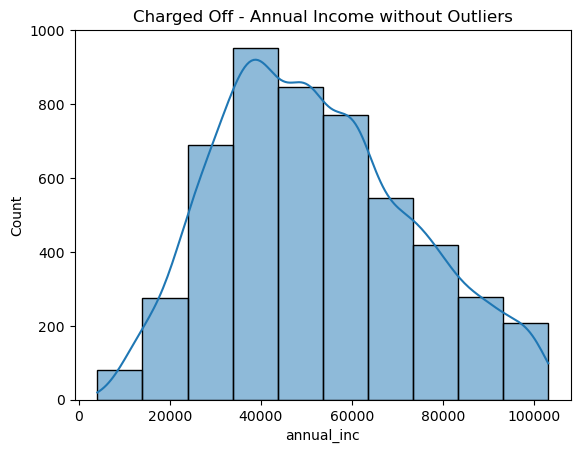

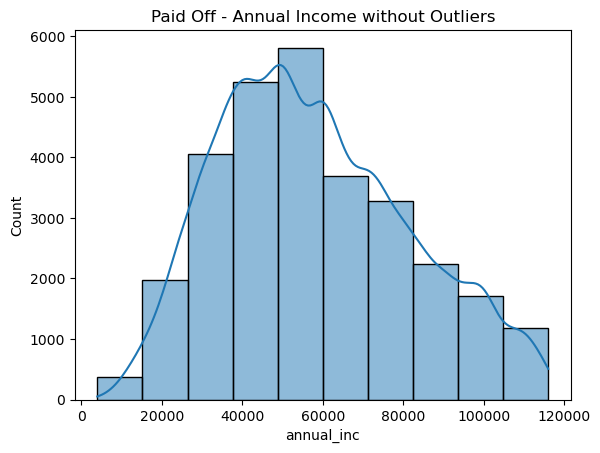

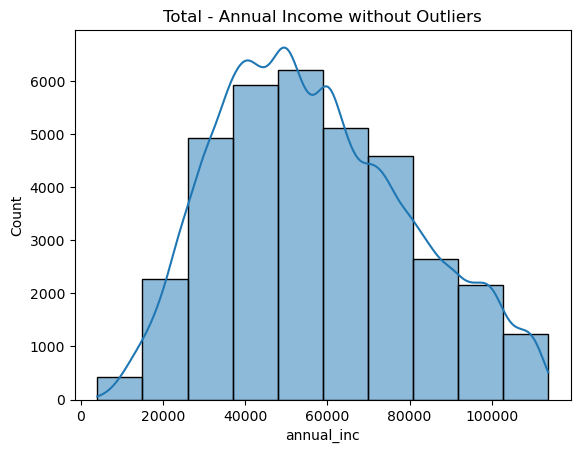

In [54]:
chargedOffDf = loan_df[loan_df['loan_status'] == 'Charged Off']
paidDf = loan_df[loan_df['loan_status'] == 'Fully Paid']


Q25 = chargedOffDf['annual_inc'].quantile(0.25)
Q75 = chargedOffDf['annual_inc'].quantile(0.75)
IQR = Q75 - Q25
lower_bound = Q25 - .75 * IQR
upper_bound = Q75 + .75 * IQR

print(f"Q1: {Q25}, Q3: {Q75}, IQR: {IQR}")
print(f"Annual Income - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


no_income_outliers_cf = chargedOffDf[ (chargedOffDf['annual_inc'] < upper_bound)]
sns.histplot(no_income_outliers_cf['annual_inc'], bins=10, kde=True)
plt.title('Charged Off - Annual Income without Outliers')
plt.show()

Q25 = paidDf['annual_inc'].quantile(0.25)
Q75 = paidDf['annual_inc'].quantile(0.75)
IQR = Q75 - Q25
lower_bound = Q25 - .75 * IQR
upper_bound = Q75 + .75 * IQR

no_income_outliers_pf = paidDf[ (paidDf['annual_inc'] < upper_bound)]
sns.histplot(no_income_outliers_pf['annual_inc'], bins=10, kde=True)
plt.title('Paid Off - Annual Income without Outliers')
plt.show()

Q25 = loan_df['annual_inc'].quantile(0.25)
Q75 = loan_df['annual_inc'].quantile(0.75)
IQR = Q75 - Q25
lower_bound = Q25 - .75 * IQR
upper_bound = Q75 + .75 * IQR

no_income_outliers_total = loan_df[(loan_df['annual_inc'] < upper_bound)]
sns.histplot(no_income_outliers_total['annual_inc'], bins=10, kde=True)
plt.title('Total - Annual Income without Outliers')
plt.show()



OBSERVATION

-   Most loans taken by people with income in range ~30000-75000
-   Also most defaults are done by people within same range  ~30000-75000

-   Conclusion: 
    -   No Key Impact by income slab observed on loan defaults

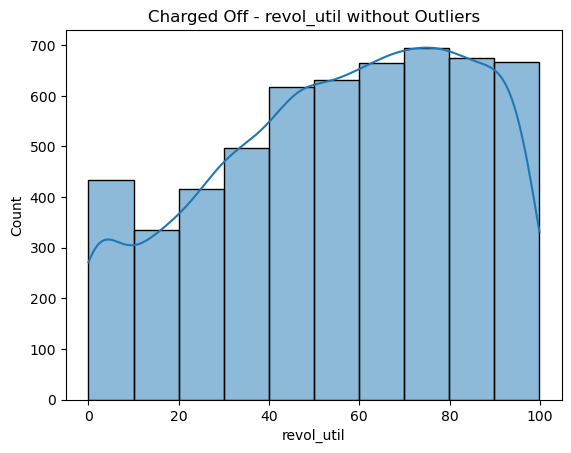

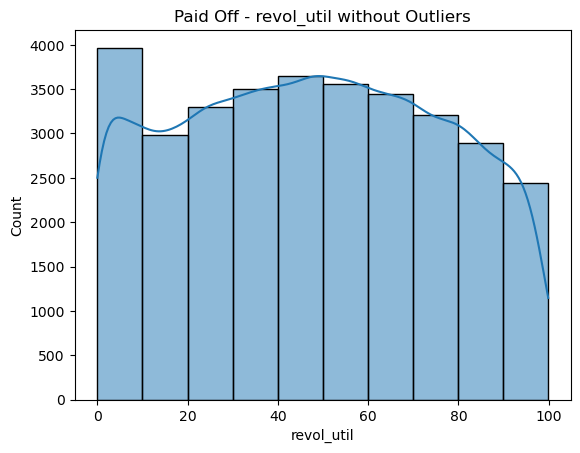

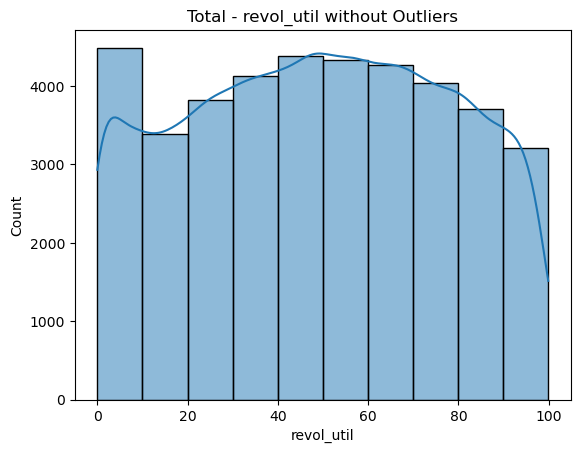

In [65]:
# Columns with intersting observations
# ['int_rate', 'revol_util']

#   'out_prncp' - wierd outliers


col = 'revol_util'
IQR_COEFF = 1.5
bins_ = 10
Q25 = chargedOffDf[col].quantile(0.25)
Q75 = chargedOffDf[col].quantile(0.75)
IQR = Q75 - Q25
lower_bound = Q25 - IQR_COEFF * IQR
upper_bound = Q75 + IQR_COEFF * IQR


no_income_outliers_facf = chargedOffDf[(chargedOffDf[col] > lower_bound) | (chargedOffDf[col] < upper_bound)]
sns.histplot(no_income_outliers_facf[col], bins=bins_, kde=True)
plt.title(f'Charged Off - {col} without Outliers')
plt.show()

Q25 = paidDf[col].quantile(0.25)
Q75 = paidDf[col].quantile(0.75)
IQR = Q75 - Q25
lower_bound = Q25 - IQR_COEFF * IQR
upper_bound = Q75 + IQR_COEFF * IQR

no_income_outliers_fapf = paidDf[ (paidDf[col] > lower_bound) | (paidDf[col] < upper_bound)]
sns.histplot(no_income_outliers_fapf[col], bins=bins_, kde=True)
plt.title(f'Paid Off - {col} without Outliers')
plt.show()

Q25 = loan_df[col].quantile(0.25)
Q75 = loan_df[col].quantile(0.75)
IQR = Q75 - Q25
lower_bound = Q25 - IQR_COEFF * IQR
upper_bound = Q75 + IQR_COEFF * IQR

no_income_outliers_fatotal = loan_df[(loan_df[col] > lower_bound) | (loan_df[col] < upper_bound)]
sns.histplot(no_income_outliers_fatotal[col], bins=bins_, kde=True)
plt.title(f'Total - {col} without Outliers')
plt.show()


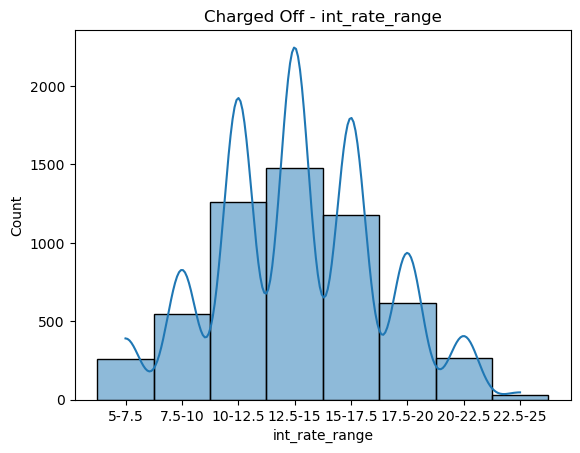

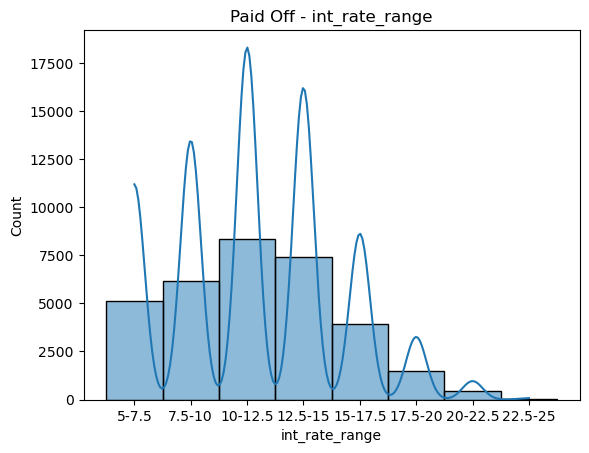

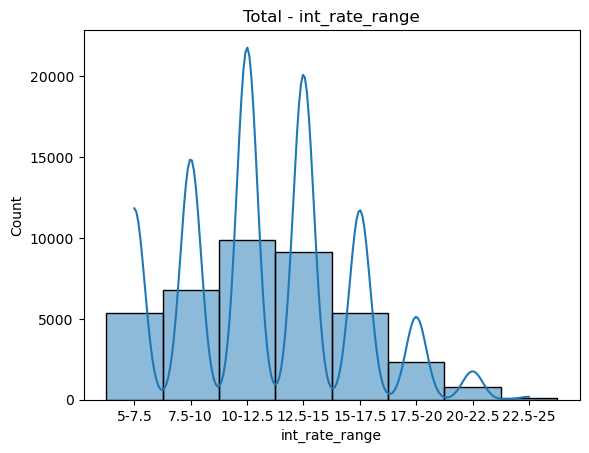

In [63]:
# Create a new column  loan_df for int_rate_range which divides int_rates into categories of 2.5 percent each, there are interest rates from 0-25

sns.histplot(chargedOffDf['int_rate_range'], bins=10, kde=True)
plt.title(f'Charged Off - {'int_rate_range'}')
plt.show()

sns.histplot(paidDf['int_rate_range'], bins=10, kde=True)
plt.title(f'Paid Off - {'int_rate_range'}')
plt.show()

sns.histplot(loan_df['int_rate_range'], bins=10, kde=True)
plt.title(f'Total - {'int_rate_range'}')
plt.show()


OBSERVATION

-   'int_rate'
        -       Highest frequency of loans observed in interest range of 10-12.5 % interest rates
        -       Highest loan defaults observed by interest rate range 22.5-25(38%), 20-22.5(33%), 17.5-20 (26%), 15-17.5(22%)
        -       Loans from 15-25 % interest rates are most defaulted

-   'revol_util':
        -     More charge offs(compared to general data pattern) is observed in range of 50-95
        -       A high revolving balance on a loan means you are carrying over a large p  debt from one month to the next on a revolving credit account, such as a credit card or a revolving line of credit. Instead of paying your balance in full, you are only making minimum payments
        -       revol_util = revol_bal/total_credit

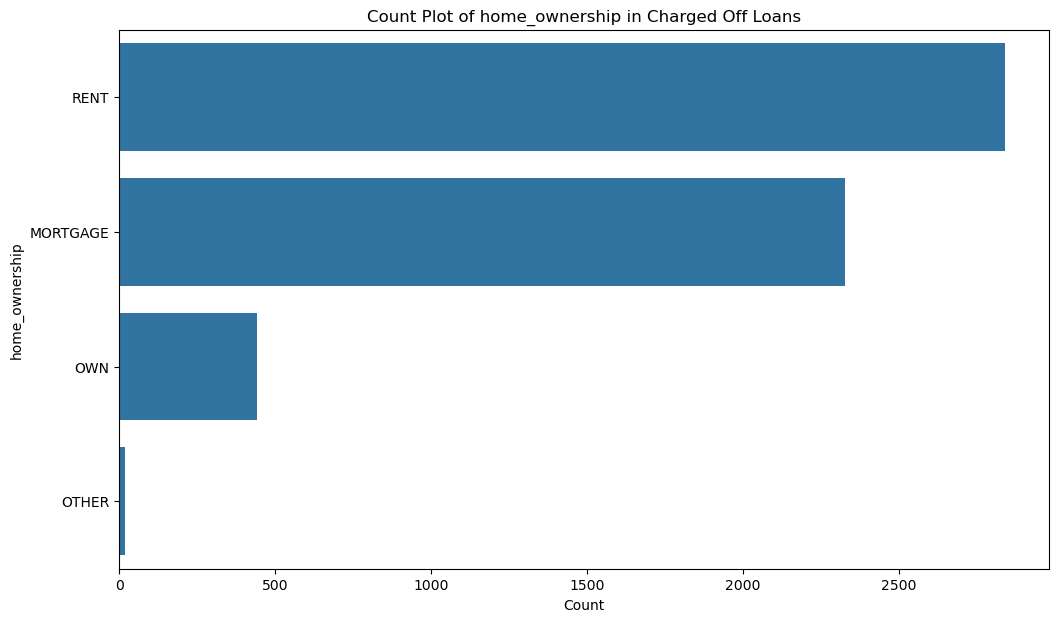

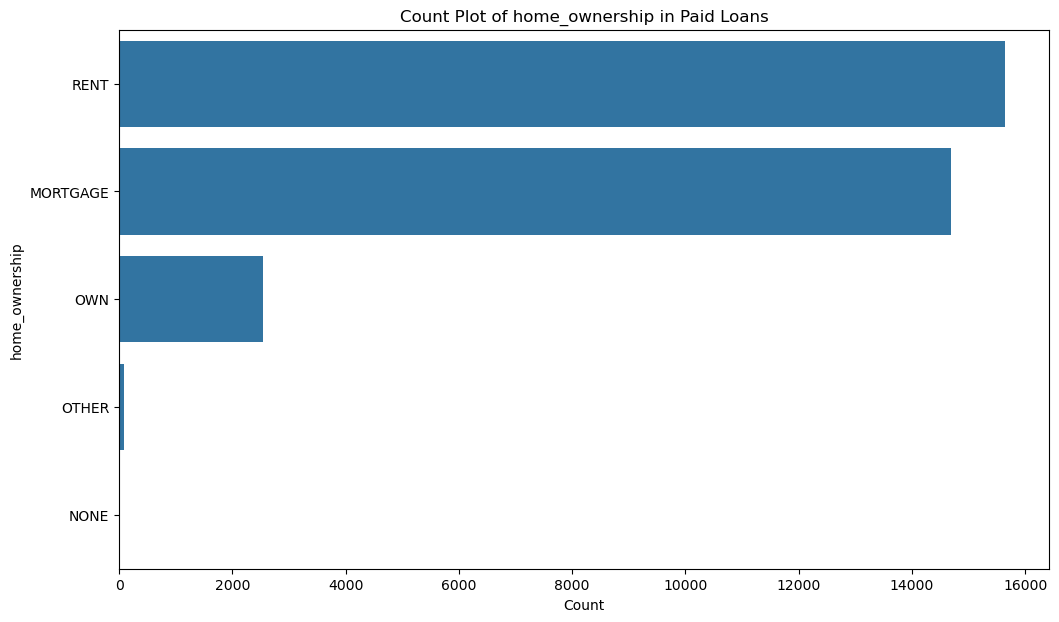

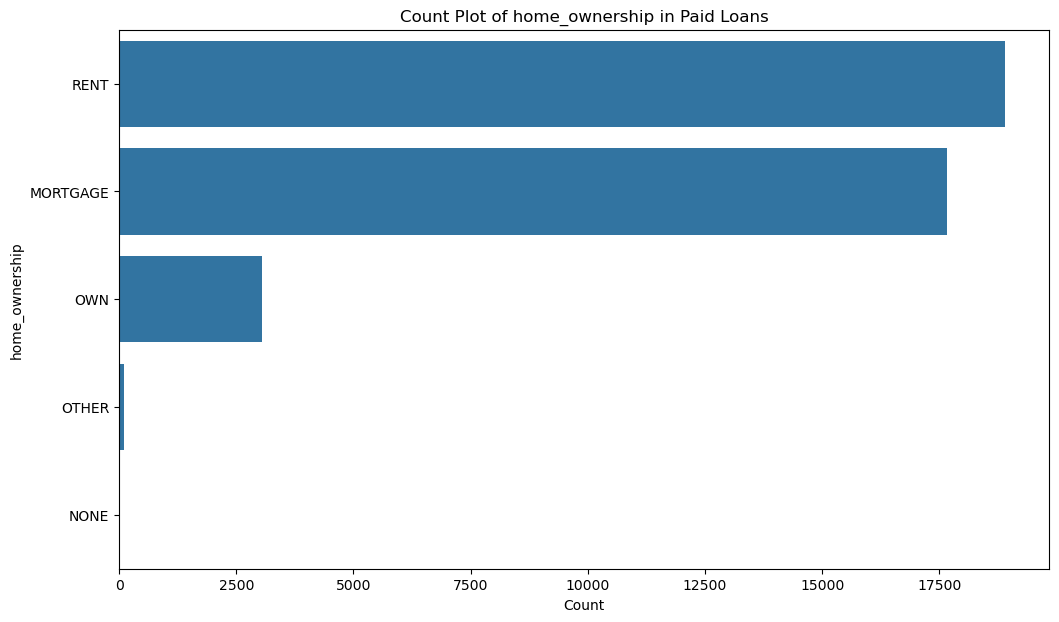

In [57]:
# countplots for categorical variables in chargedOffDf
#['term', 'grade', 'home_ownership', 'emp_length', 'purpose','addr_state','earliest_cr_line']

# for col in ['term', 'grade', 'home_ownership', 'emp_length', 'purpose','addr_state','earliest_cr_line']:
#     plt.figure(figsize=(18, 9))
#     ax = sns.countplot(y=col, data=chargedOffDf, order=chargedOffDf[col].value_counts().index)
#     plt.title(f'Count Plot of {col} in Charged Off Loans')
#     plt.xlabel('Count')
#     plt.ylabel(col)
#     plt.show()


#Data frame for comparison to find patterns
# chargedOffDf, paidDf, loan_df
#['term','grade','home_ownership','purpose','addr_state']
col = 'home_ownership'

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=col, data=chargedOffDf, order=chargedOffDf[col].value_counts().index)
plt.title(f'Count Plot of {col} in Charged Off Loans')
plt.xlabel('Count')
plt.ylabel(col)
plt.show()

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=col, data=paidDf, order=paidDf[col].value_counts().index)
plt.title(f'Count Plot of {col} in Paid Loans')
plt.xlabel('Count')
plt.ylabel(col)
plt.show()

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=col, data=loan_df, order=loan_df[col].value_counts().index)
plt.title(f'Count Plot of {col} in Paid Loans')
plt.xlabel('Count')
plt.ylabel(col)
plt.show()

Terms for grade G term
60    80
36    21
Name: count, dtype: int64
Revolving utilisation for grade G count    101.000000
mean      71.410538
std       27.438532
min        0.000000
25%       51.800000
50%       81.100000
75%       95.500000
max       99.900000
Name: revol_util, dtype: float64


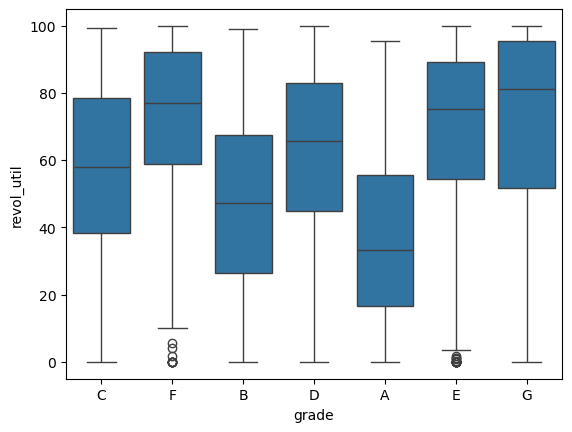

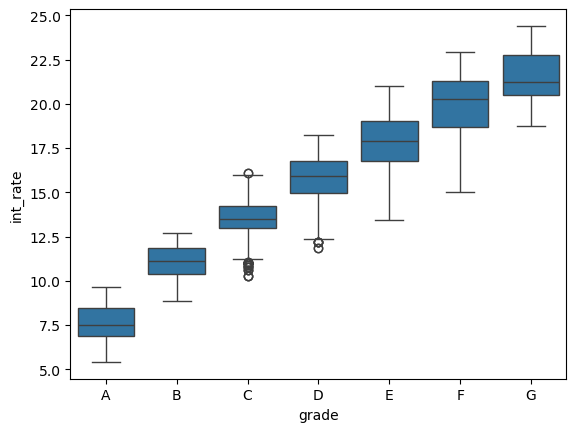

In [74]:
# Segmented analysis by Grade for charged off loans
print('Terms for grade G',chargedOffDf[chargedOffDf['grade'] == 'G']['term'].value_counts())
print('Revolving utilisation for grade G',chargedOffDf[chargedOffDf['grade'] == 'G']['revol_util'].describe())

sns.boxplot(x='grade', y='revol_util', data=chargedOffDf)
plt.show()

sns.boxplot(x='grade', y='int_rate', data=chargedOffDf, order=sorted(chargedOffDf['grade'].unique()))
plt.show()

OBSERVATIONS FOR CATEGORICAL VARIABLE
-   'term'
    -   60 Month term loan is more charged off, 
    -   General trend is people opt for 36 month loan more hence 36 month loans are more in number as well as more charged off
    -   But Although 60 month loans are opted less but whoever opts it has more chances of defaulting
    -   in terms of approx ratio 36M - 3000/30000 (10%), 60M - 2500/10000 (25%)


-   'grade'
    -   General trend of loans given is B > A > C > D > E > F > G
    -   Charge off trend B > C > D > E > A > F > G
    -   Calculate percentages using:  chargedOffDf[chargedOffDf['grade'] == 'A'].shape[0]/loan_df[loan_df['grade'] == 'A'].shape[0]
    -   Charge off % by grade B (11.8), C (16.6), D (21), E(25%), A (6), F(30), G(32)
    -   Grades by most charge off : G > F > E > D > C > B > A
    -   80% grade G loans (worst performing) are of 60 months
    -   mean revol_util for grade G loans is 71.4

-   'home_ownership'
    -   Most charge offs are done by 'OTHER' category with 18.4% charge off
    -  OTHER is a confusing ctegory, there is also a NONE, this needs to be clarified if it si conclusinve enouugh.

-   'purpose'
    -  Most charge offs done by loans with purpose: small_business with 25% charge offs

-   'addr_state'
    -  Most charege offs by state - NV at 22% deviation from general pattern fo 12-17 percent

-   'earliest_cr_line'
    -   Most defaulting customer started their credit relations in 2007 (20%), 2006(19%), 1973 (18%)

In [68]:
#chargedOffDf[chargedOffDf['home_ownership'] == 'NONE'].shape[0]/loan_df[loan_df['home_ownership'] == 'NONE'].shape[0]
   
# RENT - 15
# MORTGAGE - 13
# OWN - 14.5
# OTHER - 18.4

# 'emp_length'
#chargedOffDf[chargedOffDf['emp_length'] == '9 years'].shape[0]/loan_df[loan_df['emp_length'] == '9 years'].shape[0]

# '10+ years' - 15
# < 1 year - 14
# 1 year - 14
# 2 years - 13
# 3 years - 13.5
# 4 years - 13
# 5 years - 14
# 6 years - 14
# 7 years - 15
# 8 years - 14
# 9 years - 13
# No particular pattern observed

#'purpose'
#chargedOffDf[chargedOffDf['purpose'] == 'renewable_energy'].shape[0]/loan_df[loan_df['purpose'] == 'renewable_energy'].shape[0]
# debt_consolidation    15
# other                  16
# credit_card            10
# small_business         25
# home_improvement       12
# major_purchase         10
# car                    10
# medical                15
# wedding                 10
# moving                  16
# house                   15
# educational             17
# vacation                14
# renewable_energy        18

colName = 'int_rate_range'
for colVal in chargedOffDf[colName].value_counts().index.to_list():
    try:
        print(f"{colVal}: {chargedOffDf[chargedOffDf[colName] == colVal].shape[0]/loan_df[loan_df[colName] == colVal].shape[0]}")
    except Exception as e:
        print(f'Unable to calculate percentage for {colVal}')




12.5-15: 0.1613079615048119
10-12.5: 0.12756287243712755
15-17.5: 0.22134683924216844
17.5-20: 0.26385904598195103
7.5-10: 0.0802660753880266
20-22.5: 0.3350125944584383
5-7.5: 0.04761019155663009
22.5-25: 0.38461538461538464
Unable to calculate percentage for 0-2.5
Unable to calculate percentage for 2.5-5


In [59]:
print('1973: ',chargedOffDf[chargedOffDf['earliest_cr_line'] == 1973]['loan_amnt'].describe())

print('2006: ',chargedOffDf[chargedOffDf['earliest_cr_line'] == 2006]['loan_amnt'].describe())

print('2007: ',chargedOffDf[chargedOffDf['earliest_cr_line'] == 2007]['loan_amnt'].describe())


1973:  count       12.000000
mean     13166.666667
std       9485.235736
min       2000.000000
25%       6250.000000
50%      11500.000000
75%      16250.000000
max      35000.000000
Name: loan_amnt, dtype: float64
2006:  count      224.000000
mean      7490.848214
std       4787.483676
min       1000.000000
25%       4000.000000
50%       6700.000000
75%      10000.000000
max      30000.000000
Name: loan_amnt, dtype: float64
2007:  count      144.000000
mean      6903.298611
std       4643.275880
min       1000.000000
25%       3600.000000
50%       6000.000000
75%       9431.250000
max      25000.000000
Name: loan_amnt, dtype: float64


As per 'earliest_cr_line'

-   Customers who started their credit relations at 1973, 2006 and 2007 had highest charge off rate
-   Out of these 3 years most losses would have been incurred by customers starting their credit relations in 1973
    -   1973 had mean loan_amt and max loan_amount greater than the loans in 2006 and 2007